In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
# Now working with real data

# Load the data

df = pd.read_excel("Movie Recommendation 2024 (Responses).xlsx")
df.head(10)

,Timestamp,Your name,Sholay,Swades (We The People),The Matrix (I),Interstellar,Dangal,Taare Zameen Par,Shawshank Redemption,The Dark Knight,Notting Hill,Uri: The Surgical Strike
0,2024-02-06 09:42:36.374,Srijahnavi,4.0,3.0,4.0,5.0,5,4.0,4.0,5.0,4.0,5.0
1,2024-02-06 09:42:50.227,Priya,3.0,3.0,3.0,4.0,4,4.0,5.0,3.0,3.0,4.0
2,2024-02-06 09:43:05.181,Pulkit Gautam,4.0,5.0,5.0,5.0,3,3.0,5.0,5.0,4.0,3.0
3,2024-02-06 09:43:16.138,Twinkle Devda,5.0,4.0,5.0,4.0,2,4.0,NaN,NaN,NaN,4.0
4,2024-02-06 09:43:18.300,Ishika Raj,5.0,5.0,4.0,5.0,5,5.0,NaN,NaN,NaN,NaN
5,2024-02-06 09:43:37.950,Kaushik,1.0,4.0,5.0,5.0,2,4.0,5.0,3.0,NaN,4.0
6,2024-02-06 09:43:48.787,Kajal,3.0,4.0,NaN,4.0,3,5.0,NaN,NaN,NaN,4.0
7,2024-02-06 09:43:58.223,sawan verma,4.0,5.0,5.0,5.0,4,4.0,NaN,4.0,NaN,4.0
8,2024-02-06 09:43:58.698,Daksh Jain,5.0,NaN,5.0,5.0,4,4.0,5.0,5.0,NaN,4.0
9,2024-02-06 09:44:13.505,Akshat Pratap Singh,4.0,NaN,5.0,5.0,4,NaN,NaN,5.0,NaN,4.0


In [5]:
# Discard the timestamp column

df = df.drop('Timestamp', axis=1)

# Make the "Your Name" column the index

df = df.set_index('Your name')
df

,Sholay,Swades (We The People),The Matrix (I),Interstellar,Dangal,Taare Zameen Par,Shawshank Redemption,The Dark Knight,Notting Hill,Uri: The Surgical Strike
Your name,,,,,,,,,,
Srijahnavi,4.0,3.0,4.0,5.0,5,4.0,4.0,5.0,4.0,5.0
Priya,3.0,3.0,3.0,4.0,4,4.0,5.0,3.0,3.0,4.0
Pulkit Gautam,4.0,5.0,5.0,5.0,3,3.0,5.0,5.0,4.0,3.0
Twinkle Devda,5.0,4.0,5.0,4.0,2,4.0,NaN,NaN,NaN,4.0
Ishika Raj,5.0,5.0,4.0,5.0,5,5.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
Prince Kumar,3.0,3.0,5.0,5.0,5,5.0,5.0,5.0,5.0,3.0
Vedanshi Raiyani,4.0,NaN,5.0,5.0,5,4.0,NaN,NaN,NaN,5.0
Rathod Vatsalraj,4.0,NaN,4.0,5.0,5,4.0,3.0,4.0,NaN,5.0


In [6]:
df.index

Index(['Srijahnavi ', 'Priya', 'Pulkit Gautam', 'Twinkle Devda ',
       'Ishika Raj ', 'Kaushik', 'Kajal', 'sawan verma', 'Daksh Jain',
       'Akshat Pratap Singh ', 'Shah Faisal Khan ', 'Devashish Nagpal',
       'Viraj Vekaria ', 'Tamizhanban A G', 'Het Pathak', 'Gaurav Shah',
       'Ruchit Jagodara ', 'Hirva Patel ', 'Prathmesh Maharshi ', 'Anura',
       'Kishan Ved', 'Kaveri ', 'Kaveri ', 'Tirth Patel ', 'Aditya Mehta ',
       'Anshul Mantri', 'Nitin Kumar Singh', 'Thumma Ushasree',
       'Joshi Siddharth ', 'Pavan Deekshith Doddi ', 'Yash Bachwana',
       'Parag Sarvoday Sahu ', 'Dhakad Bhagat Singh ', 'Shivam Jadhao ',
       'Abhishek Mandlik ', 'Guntas Singh Saran', 'Dakshata Bhamare',
       'Samyak Gosalia', 'Ruchit Chudasama ', 'Hrishikesh C P', 'Rahul R Pai',
       'Basavala Prashant Kumar ', 'Nikhitha', 'Pratik Agrawal',
       'Shreyans Jain ', 'Kushagra Jain', 'Gajanan Donge ',
       'John Twipraham Debbarma', 'Shataxi Dubey ', 'Divyansh Saini ',
       'Farhan 

In [7]:
# Get index for user and movie
user = 'Ayush Shrivastava'

print(user in df.index)

# Get the movie ratings for user
user_ratings = df.loc[user]
user_ratings

True


Sholay                      5.0
Swades (We The People)      4.0
The Matrix (I)              5.0
Interstellar                5.0
Dangal                      3.0
Taare Zameen Par            4.0
Shawshank Redemption        4.0
The Dark Knight             4.0
Notting Hill                3.0
Uri: The Surgical Strike    4.0
Name: Ayush Shrivastava, dtype: float64

In [8]:
# Number of missing values
df.isnull().sum()

Sholay                      11
Swades (We The People)      29
The Matrix (I)              12
Interstellar                 9
Dangal                       0
Taare Zameen Par             1
Shawshank Redemption        34
The Dark Knight             18
Notting Hill                44
Uri: The Surgical Strike     5
dtype: int64

In [14]:
# Generic Matrix Factorization (without missing values)

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

n_users, n_movies = 20, 10

# A is a matrix of size (n_users, n_movies) randomly generated values between 1 and 5
A = torch.randint(1, 6, (n_users, n_movies), dtype=torch.float)
A

tensor([[2., 4., 1., 4., 3., 5., 5., 1., 3., 3.],
        [4., 4., 3., 3., 5., 5., 2., 5., 4., 4.],
        [5., 4., 5., 5., 3., 5., 4., 2., 2., 5.],
        [4., 4., 4., 5., 5., 1., 5., 2., 5., 5.],
        [4., 1., 3., 1., 1., 5., 4., 3., 1., 2.],
        [4., 4., 4., 1., 3., 3., 3., 2., 4., 2.],
        [5., 5., 2., 3., 4., 5., 5., 3., 1., 4.],
        [2., 2., 3., 5., 1., 4., 3., 4., 3., 1.],
        [1., 5., 4., 1., 1., 2., 5., 1., 5., 1.],
        [5., 2., 4., 5., 5., 1., 1., 1., 3., 2.],
        [5., 1., 1., 2., 4., 2., 1., 2., 3., 1.],
        [4., 3., 4., 3., 1., 1., 3., 1., 5., 2.],
        [1., 2., 2., 4., 2., 2., 5., 1., 4., 2.],
        [5., 1., 3., 4., 2., 1., 1., 3., 5., 2.],
        [1., 1., 4., 2., 2., 4., 1., 1., 2., 1.],
        [2., 3., 2., 3., 1., 5., 4., 4., 2., 5.],
        [5., 3., 2., 1., 4., 2., 4., 2., 1., 3.],
        [1., 1., 4., 2., 2., 5., 1., 5., 1., 4.],
        [4., 4., 2., 5., 4., 2., 1., 1., 1., 4.],
        [2., 1., 5., 4., 5., 1., 1., 3., 4., 2.]])

In [15]:
A.shape

torch.Size([20, 10])

Let us decompose A as WH. W is of shape (n, k) and H is of shape (k, n). We can write the above equation as:
A = WH

In [60]:
# Randomly initialize A and B

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

r = 3
W = torch.randn(n_users, r, requires_grad=True, device=device)
H = torch.randn(r, n_movies, requires_grad=True, device=device)

A = A.to(device)

# Compute the loss
with torch.no_grad():
    loss = torch.norm(torch.mm(W, H) - A)
    print(loss)

tensor(54.4886, device='cuda:0')


In [61]:
pd.DataFrame(torch.mm(W, H).cpu().detach().numpy())

,0,1,2,3,4,5,6,7,8,9
0,0.960631,-1.234597,1.174818,-0.999765,0.237830,1.864976,0.519434,-2.580524,-1.471387,1.041185
1,-1.693184,2.106399,-1.939065,1.777213,-0.311487,-2.602445,-0.782032,3.843017,2.235000,-1.347901
2,-0.373823,-0.533497,-3.165714,2.531494,-1.678776,-3.835717,-2.966169,4.234484,3.354229,-1.819774
3,-1.075516,0.201070,-1.765967,2.490199,-0.269628,1.936088,-1.048494,-1.240820,0.210037,2.161197
4,-0.028516,0.876004,0.319336,-0.958606,0.018494,-2.818869,0.350975,2.912241,1.006289,-2.332543
5,3.929151,-4.633563,1.349315,-3.068743,-1.491175,-4.009732,-1.390210,1.449100,0.739868,-3.562217
6,-1.950831,3.092077,0.246755,0.349341,1.161841,1.032322,1.628842,0.254056,-0.467370,0.669982
7,-1.225124,1.369778,-0.976484,1.263135,0.105235,0.015258,-0.132748,0.824387,0.589789,0.352291
8,0.646952,-2.270853,-1.843904,1.864861,-1.266480,0.262095,-2.342429,-0.683251,0.865239,0.918603
9,-0.309519,-0.016052,-0.798890,0.911602,-0.256802,0.066911,-0.598124,0.150428,0.424447,0.347383


In [62]:
pd.DataFrame(A.cpu().detach().numpy())

,0,1,2,3,4,5,6,7,8,9
0,2.0,4.0,1.0,4.0,3.0,5.0,5.0,1.0,3.0,3.0
1,4.0,4.0,3.0,3.0,5.0,5.0,2.0,5.0,4.0,4.0
2,5.0,4.0,5.0,5.0,3.0,5.0,4.0,2.0,2.0,5.0
3,4.0,4.0,4.0,5.0,5.0,1.0,5.0,2.0,5.0,5.0
4,4.0,1.0,3.0,1.0,1.0,5.0,4.0,3.0,1.0,2.0
5,4.0,4.0,4.0,1.0,3.0,3.0,3.0,2.0,4.0,2.0
6,5.0,5.0,2.0,3.0,4.0,5.0,5.0,3.0,1.0,4.0
7,2.0,2.0,3.0,5.0,1.0,4.0,3.0,4.0,3.0,1.0
8,1.0,5.0,4.0,1.0,1.0,2.0,5.0,1.0,5.0,1.0
9,5.0,2.0,4.0,5.0,5.0,1.0,1.0,1.0,3.0,2.0


In [63]:
# Optimizer
optimizer = optim.Adam([W, H], lr=0.01)

# Train the model

for i in range(600):
    # Compute the loss
    loss = torch.norm(torch.mm(W, H) - A)
    
    # Zero the gradients
    optimizer.zero_grad()
    
    # Backpropagate
    loss.backward()
    
    # Update the parameters
    optimizer.step()
    
    # Print the loss
    if i % 10 == 0:
        print(i, loss.item())

0 54.48860168457031
10 52.06049346923828
20 49.933502197265625
30 47.93745040893555
40 45.92219161987305
50 43.7530517578125
60 41.34074783325195
70 38.67937088012695
80 35.82429504394531
90 32.83304214477539
100 29.792633056640625
110 26.82835578918457
120 24.086881637573242
130 21.73990249633789
140 19.93376350402832
150 18.68069839477539
160 17.856159210205078
170 17.311002731323242
180 16.935134887695312
190 16.660980224609375
200 16.44961166381836
210 16.27753448486328
220 16.13075828552246
230 16.00128746032715
240 15.884490966796875
250 15.777608871459961
260 15.678839683532715
270 15.58670425415039
280 15.499666213989258
290 15.416008949279785
300 15.333908081054688
310 15.251591682434082
320 15.167495727539062
330 15.080418586730957
340 14.989653587341309
350 14.895134925842285
360 14.797526359558105
370 14.6982421875
380 14.599320411682129
390 14.503149032592773
400 14.412065505981445
410 14.327943801879883
420 14.251904487609863
430 14.184234619140625
440 14.12451171875
450 

In [64]:
pd.DataFrame(torch.mm(W, H).cpu().detach().numpy()).head(2)

,0,1,2,3,4,5,6,7,8,9
0,3.052177,4.091790,2.549750,2.489636,2.185115,4.111027,4.924942,2.084689,2.614054,3.240574
1,4.041134,2.927041,4.239845,4.361282,3.911896,4.842467,2.955679,4.100715,3.117717,4.055007


In [65]:
pd.DataFrame(A.cpu()).head(2)

,0,1,2,3,4,5,6,7,8,9
0,2.0,4.0,1.0,4.0,3.0,5.0,5.0,1.0,3.0,3.0
1,4.0,4.0,3.0,3.0,5.0,5.0,2.0,5.0,4.0,4.0


In [66]:
def factorize(A, k, device=torch.device("cpu")):
    """Factorize the matrix A into W and H
    A: input matrix of size (n_users, n_movies)
    k: number of latent features
    
    Returns W and H
    W: matrix of size (n_users, k)
    H: matrix of size (k, n_movies)
    """
    A = A.to(device)
    # Randomly initialize W and H
    W = torch.randn(A.shape[0], k, requires_grad=True, device=device)
    H = torch.randn(k, A.shape[1], requires_grad=True, device=device)
    
    # Optimizer
    optimizer = optim.Adam([W, H], lr=0.01)
    
    # Train the model
    for i in range(1000):
        # Compute the loss
        loss = torch.norm(torch.mm(W, H) - A)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Backpropagate
        loss.backward()
        
        # Update the parameters
        optimizer.step()
        
    return W, H, loss

In [72]:
for k in [1, 2, 3, 4, 5, 6, 9]:
    W, H, loss = factorize(A, k, device=device)
    print(k, loss.item())

1 19.049161911010742
2 16.058256149291992
3 13.475110054016113
4 11.01341438293457
5 9.007477760314941
6 7.540328025817871
9 2.389086961746216


In [73]:
pd.DataFrame(torch.mm(W,H).cpu().detach().numpy()).head(2)

,0,1,2,3,4,5,6,7,8,9
0,1.980041,4.288923,1.103562,4.162286,2.990226,4.750100,5.109063,1.378671,2.677651,2.622714
1,3.996251,4.055405,3.019903,3.031128,4.997972,4.952172,2.020761,5.072455,3.938280,3.927804


In [74]:
pd.DataFrame(A.cpu()).head(2)

,0,1,2,3,4,5,6,7,8,9
0,2.0,4.0,1.0,4.0,3.0,5.0,5.0,1.0,3.0,3.0
1,4.0,4.0,3.0,3.0,5.0,5.0,2.0,5.0,4.0,4.0


In [75]:
# With missing values

# Randomly replace some entries with NaN

A = torch.randint(1, 6, (n_users, n_movies), dtype=torch.float)
A[torch.rand(A.shape) < 0.5] = float('nan')
A

tensor([[1., nan, 4., 5., nan, nan, 4., nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, 5., nan, nan],
        [2., 4., 2., 3., nan, 5., 2., 5., 3., 4.],
        [nan, 4., nan, 1., 3., nan, nan, nan, 3., nan],
        [nan, 2., nan, 5., nan, nan, nan, 2., 3., 3.],
        [nan, nan, 1., nan, nan, 5., 2., 2., 4., 3.],
        [nan, nan, nan, nan, nan, 4., nan, nan, 5., nan],
        [1., 1., 5., 2., nan, nan, 2., 3., nan, 1.],
        [3., 3., 1., 5., nan, nan, nan, nan, 3., 5.],
        [nan, 5., nan, nan, nan, nan, nan, nan, 4., 4.],
        [1., 3., nan, nan, nan, nan, nan, nan, 4., 2.],
        [3., nan, nan, 3., 3., nan, nan, 3., nan, nan],
        [nan, 4., 3., nan, 4., nan, nan, nan, 2., nan],
        [5., 4., nan, 3., nan, 4., 5., nan, nan, 2.],
        [nan, nan, nan, nan, nan, nan, 4., nan, 1., 3.],
        [nan, 3., 1., 4., nan, nan, nan, nan, nan, nan],
        [2., 2., 3., nan, 1., 4., nan, 1., 2., 2.],
        [4., 1., nan, nan, nan, nan, nan, 3., 4., 4.],
    

In [77]:
W, H, loss = factorize(A, 2, device=device)
loss

tensor(nan, device='cuda:0', grad_fn=<LinalgVectorNormBackward0>)

As expected, the above function does not work. Our current loss function does not handle missing values.

In [79]:
mask = ~torch.isnan(A)
mask

tensor([[ True, False,  True,  True, False, False,  True, False, False, False],
        [False, False, False, False, False, False, False,  True, False, False],
        [ True,  True,  True,  True, False,  True,  True,  True,  True,  True],
        [False,  True, False,  True,  True, False, False, False,  True, False],
        [False,  True, False,  True, False, False, False,  True,  True,  True],
        [False, False,  True, False, False,  True,  True,  True,  True,  True],
        [False, False, False, False, False,  True, False, False,  True, False],
        [ True,  True,  True,  True, False, False,  True,  True, False,  True],
        [ True,  True,  True,  True, False, False, False, False,  True,  True],
        [False,  True, False, False, False, False, False, False,  True,  True],
        [ True,  True, False, False, False, False, False, False,  True,  True],
        [ True, False, False,  True,  True, False, False,  True, False, False],
        [False,  True,  True, False,  Tr

In [80]:
mask.sum()

tensor(91)

In [81]:
W = torch.randn(A.shape[0], k, requires_grad=True, device=device)
H = torch.randn(k, A.shape[1],  requires_grad=True, device=device)

diff_matrix = torch.mm(W, H)-A.to(device)
diff_matrix.shape

torch.Size([20, 10])

In [82]:
# Mask the matrix
diff_matrix[mask].shape

torch.Size([91])

In [110]:
# Modify the loss function to ignore NaN values

def factorize(A, k, device=torch.device("cpu")):
    """Factorize the matrix D into A and B"""
    A = A.to(device)
    # Randomly initialize A and B
    W = torch.randn(A.shape[0], k, requires_grad=True, device=device)
    H = torch.randn(k, A.shape[1], requires_grad=True, device=device)
    # Optimizer
    optimizer = optim.Adam([W, H], lr=0.01)
    mask = ~torch.isnan(A)
    # Train the model
    for i in range(1000):
        # Compute the loss
        diff_matrix = torch.mm(W, H) - A
        diff_vector = diff_matrix[mask]
        loss = torch.norm(diff_vector)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Backpropagate
        loss.backward()
        
        # Update the parameters
        optimizer.step()
        
    return W, H, loss

In [111]:
W, H, loss = factorize(A, 5, device=device)
loss

tensor(10.0489, device='cuda:0', grad_fn=<LinalgVectorNormBackward0>)

In [112]:
torch.mm(W, H)

tensor([[4.4113, 3.2796, 3.7335, 4.9824, 4.9225, 4.5505, 4.1684, 4.8581, 3.8486,
         4.1977],
        [3.1197, 3.5103, 3.2867, 3.6256, 4.1803, 3.8785, 4.3176, 3.2433, 3.5475,
         3.4799],
        [3.8757, 4.0432, 5.4331, 5.0450, 3.0818, 3.5526, 5.4354, 4.5814, 3.5722,
         3.1920],
        [4.7433, 4.0778, 5.0077, 4.1570, 2.1483, 3.5445, 2.4494, 3.3360, 1.1338,
         4.3258],
        [4.9985, 4.6295, 4.3594, 4.7045, 5.0502, 5.2504, 3.9702, 4.0486, 3.3074,
         5.4108],
        [1.4161, 4.7139, 4.9473, 4.2154, 2.1257, 4.2858, 4.7320, 3.6377, 3.0166,
         3.0482],
        [2.8484, 3.9850, 3.8316, 4.1135, 3.0523, 4.7459, 2.6110, 3.6597, 2.1505,
         4.2532],
        [4.0671, 4.7211, 5.2292, 4.7365, 3.9514, 4.2411, 5.5687, 4.0556, 3.8156,
         3.9969],
        [4.9398, 3.8364, 5.0277, 5.2336, 4.0838, 3.9569, 4.9392, 4.8287, 3.6325,
         3.9675],
        [3.9926, 4.1448, 4.9270, 5.2274, 3.9800, 4.5109, 4.9184, 4.8524, 3.7348,
         3.9985],
        [4

In [113]:
df.values.shape

(80, 10)

In [114]:
A = torch.tensor(df.values, dtype=torch.float)
W, H, loss = factorize(A, 5, device=device)

In [132]:
# Dropdown menu for user and predict for all movies
from ipywidgets import interact, widgets



def predict_movie_ratings(user, df, W, H):
    idx = df.index.get_loc(user)
    user_ratings = df.iloc[idx]
    user_ratings = user_ratings.dropna()
    user_ratings = user_ratings.to_frame().T
    user_ratings = user_ratings.reindex(columns=df.columns, fill_value=float('nan'))
    user_ratings = user_ratings.to_numpy()
    
    predicted_ratings = torch.mm(W, H).cpu().detach().numpy()
    return pd.DataFrame({"Observed": user_ratings.flatten(), "Predicted": predicted_ratings[idx].flatten()}, index=df.columns)


In [133]:
predict_movie_ratings('Ayush Shrivastava', df, W, H)

,Observed,Predicted
Sholay,5.0,4.690251
Swades (We The People),4.0,4.256683
The Matrix (I),5.0,5.250936
Interstellar,5.0,4.712091
Dangal,3.0,3.318085
Taare Zameen Par,4.0,3.891454
Shawshank Redemption,4.0,4.025987
The Dark Knight,4.0,4.091714
Notting Hill,3.0,2.866672
Uri: The Surgical Strike,4.0,3.915513


In [134]:
interact(predict_movie_ratings, user=widgets.Dropdown(options=df.index, value=df.index[0], description='User'), df=widgets.fixed(df), W=widgets.fixed(W), H=widgets.fixed(H))

interactive(children=(Dropdown(description='User', options=('Srijahnavi ', 'Priya', 'Pulkit Gautam', 'Twinkle …

<function __main__.predict_movie_ratings(user, df, W, H)>

In [136]:
# Image completion
import os
if os.path.exists('dog.jpg'):
    print('dog.jpg exists')
else:
    !wget https://segment-anything.com/assets/gallery/AdobeStock_94274587_welsh_corgi_pembroke_CD.jpg -O dog.jpg

dog.jpg exists


In [171]:
# Read in a image from torchvision
import torchvision
img = torchvision.io.read_image("dog.jpg")
print(img.shape)

torch.Size([3, 1365, 2048])


In [172]:
# Make grayscale
img = torch.tensor(img, dtype=torch.float)
img = img.mean(dim=0, keepdim=False)
print(img.shape)

torch.Size([1365, 2048])


/tmp/ipykernel_3296366/232810751.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img = torch.tensor(img, dtype=torch.float)


In [173]:
img.shape

torch.Size([1365, 2048])

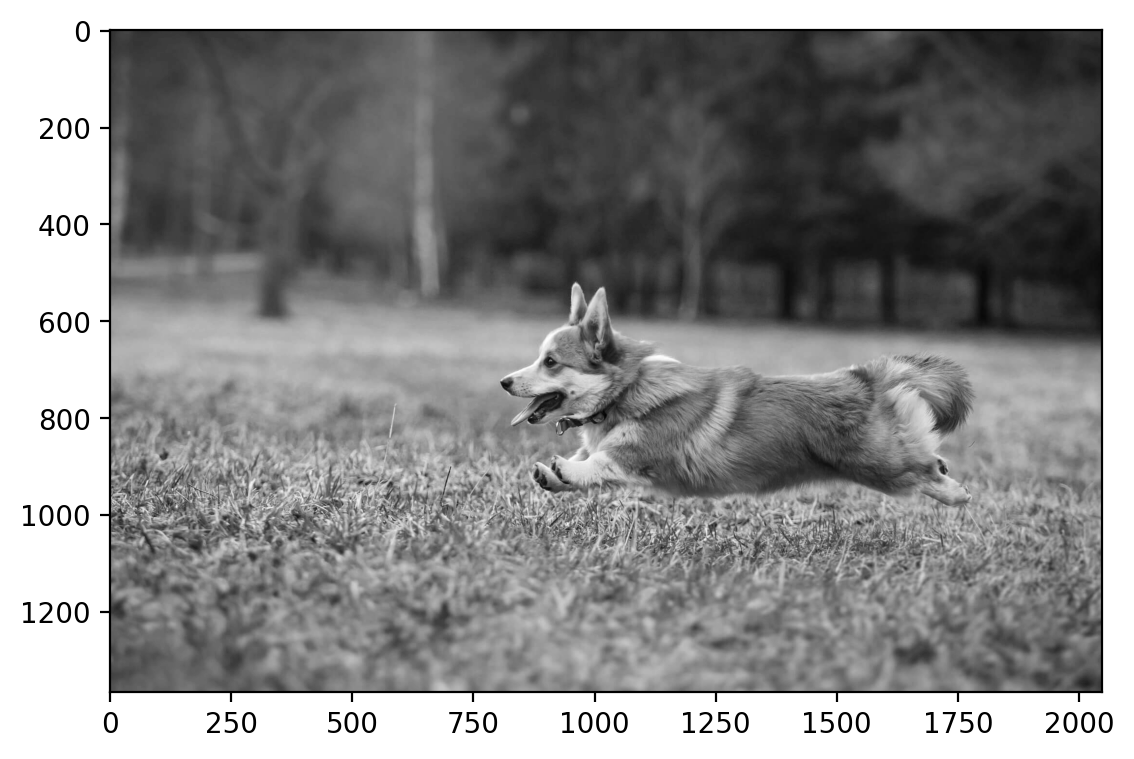

In [174]:
plt.imshow(img, cmap='gray')

In [175]:
crop = torchvision.transforms.functional.crop(img, 600, 800, 300, 300)
crop.shape

torch.Size([300, 300])

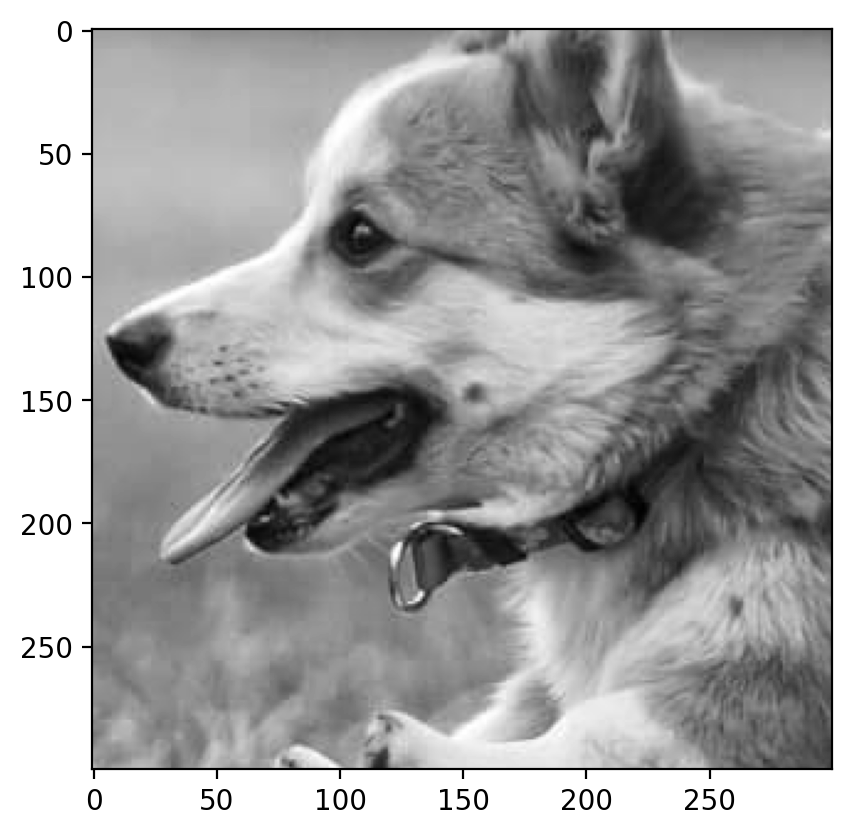

In [176]:
plt.imshow(crop, cmap='gray')

In [185]:
# Mask the image with NaN values 
def mask_image(img, prop):
    img_copy = img.clone()
    mask = torch.rand(img.shape) < prop
    img_copy[mask] = float('nan')
    return img_copy, mask

In [216]:
masked_img = mask_image(crop, 0.3)


In [217]:
masked_img[1].sum()

tensor(26954)

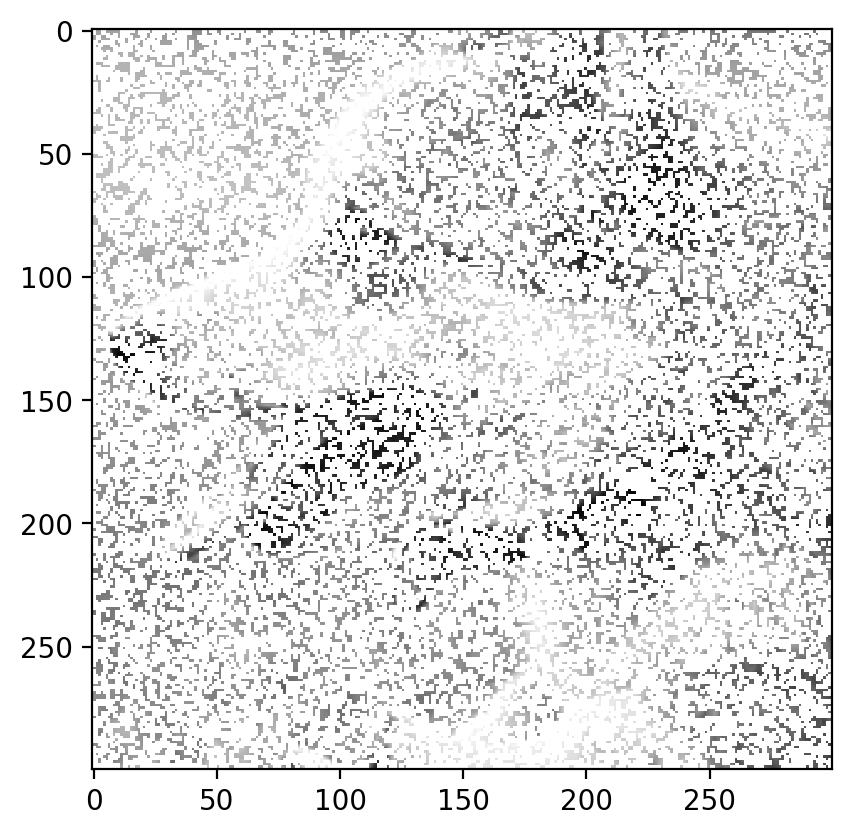

In [218]:
plt.imshow(masked_img[0], cmap='gray')

In [219]:
W, H, loss = factorize(masked_img[0], 50, device=device)

In [220]:
loss

tensor(1352.3215, device='cuda:0', grad_fn=<LinalgVectorNormBackward0>)

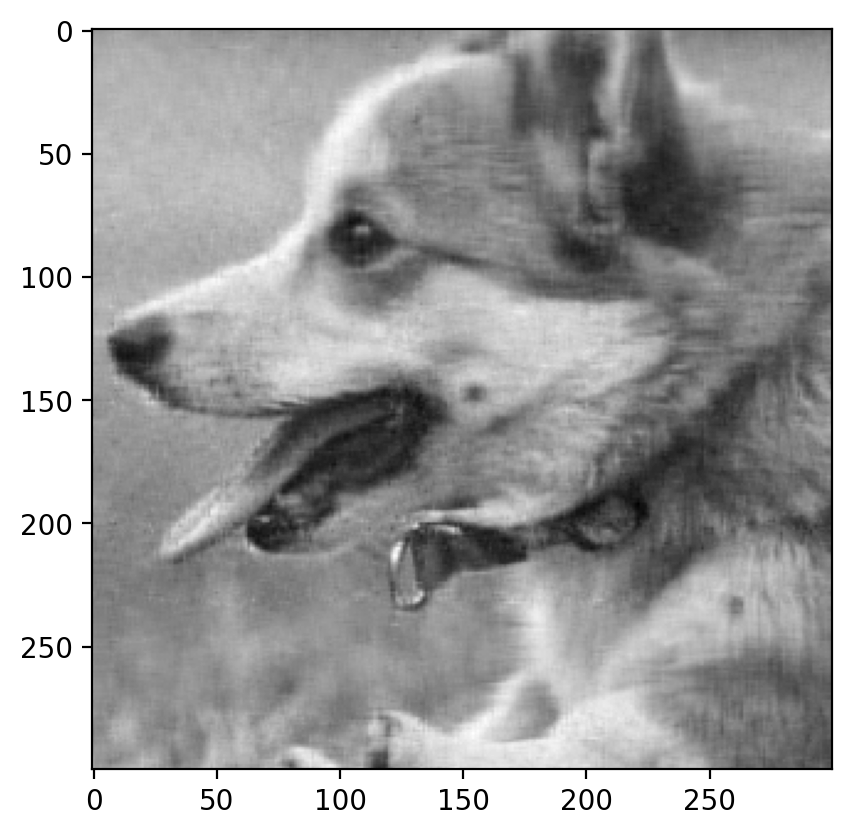

In [221]:
plt.imshow(torch.mm(W, H).cpu().detach().numpy(), cmap='gray')

In [224]:
def plot_image_completion(prop=0.1, factors=50):
    masked_img, mask = mask_image(crop, prop)
    W, H, loss = factorize(masked_img, factors, device=device)
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    reconstructed_img = torch.mm(W, H).cpu().detach().numpy()
    ax[0].imshow(masked_img, cmap='gray')
    ax[0].set_title("Masked image")
    ax[1].imshow(reconstructed_img, cmap='gray')
    ax[1].set_title("Reconstructed image")

In [227]:
interact(plot_image_completion, prop=widgets.FloatSlider(min=0.01, max=0.9, step=0.01, value=0.3), factors=widgets.IntSlider(min=1, max=150, step=1, value=50))

interactive(children=(FloatSlider(value=0.3, description='prop', max=0.9, min=0.01, step=0.01), IntSlider(valu…

<function __main__.plot_image_completion(prop=0.1, factors=50)>

In [45]:
# Now use matrix faactaorization to predict the ratings

import torch
import torch.nn as nn
import torch.nn.functional as F

# Create a class for the model

class MatrixFactorization(nn.Module):
    def __init__(self, n_users, n_movies, n_factors=20):
        super().__init__()
        self.user_factors = nn.Embedding(n_users, n_factors)
        self.movie_factors = nn.Embedding(n_movies, n_factors)

    def forward(self, user, movie):
        return (self.user_factors(user) * self.movie_factors(movie)).sum(1)      

In [46]:
model = MatrixFactorization(n_users, n_movies, 2)
model

MatrixFactorization(
  (user_factors): Embedding(100, 2)
  (movie_factors): Embedding(10, 2)
)

In [47]:
model(torch.tensor([0]), torch.tensor([2]))

tensor([-0.0271], grad_fn=<SumBackward1>)

In [48]:
A[0, 2]

tensor(5.)

In [49]:
type(A)

torch.Tensor

In [50]:
mask = ~torch.isnan(A)

# Get the indices of the non-NaN values
i, j = torch.where(mask)

# Get the values of the non-NaN values
v = A[mask]

# Store in PyTorch tensors
users = i.to(torch.int64)
movies = j.to(torch.int64)
ratings = v.to(torch.float32)

In [51]:
pd.DataFrame({'user': users, 'movie': movies, 'rating': ratings})

,user,movie,rating
0,0,1,5.0
1,0,2,5.0
2,0,4,1.0
3,0,5,1.0
4,0,6,4.0
...,...,...,...
512,98,8,2.0
513,98,9,4.0
514,99,0,1.0
515,99,4,2.0


In [52]:
# Fit the Matrix Factorization model
model = MatrixFactorization(n_users, n_movies, 4)
optimizer = optim.Adam(model.parameters(), lr=0.01)

for i in range(1000):
    # Compute the loss
    pred = model(users, movies)
    loss = F.mse_loss(pred, ratings)
    
    # Zero the gradients
    optimizer.zero_grad()
    
    # Backpropagate
    loss.backward()
    
    # Update the parameters
    optimizer.step()
    
    # Print the loss
    if i % 100 == 0:
        print(loss.item())


14.604362487792969
4.332712650299072
1.0960761308670044
0.6966323852539062
0.5388827919960022
0.45243579149246216
0.4012693464756012
0.3728969395160675
0.35568001866340637
0.34289655089378357


In [53]:
model(users, movies)

tensor([3.5693, 4.5338, 2.6934, 1.8316, 4.8915, 2.0194, 2.7778, 1.8601, 2.1124,
        1.1378, 2.9079, 5.0470, 0.9911, 1.9791, 1.0050, 3.9618, 2.0085, 2.0034,
        4.0113, 1.9218, 2.9801, 1.0432, 3.8993, 4.1292, 1.9357, 3.8285, 3.5266,
        1.3640, 2.3989, 2.4166, 0.8559, 3.3685, 4.4493, 3.4018, 1.4722, 4.8378,
        4.6684, 4.4473, 4.3097, 2.0022, 5.0147, 5.0113, 1.9599, 2.8305, 1.4493,
        1.6750, 0.9520, 3.8460, 5.1279, 4.7453, 2.1484, 1.8009, 3.2104, 4.2068,
        4.5473, 2.9229, 1.1817, 3.1108, 3.2157, 1.2238, 3.6272, 3.9029, 3.2554,
        0.9945, 3.0062, 5.0030, 4.1144, 1.6314, 3.7945, 3.3091, 4.0727, 3.6212,
        2.4359, 3.5707, 1.2826, 0.9663, 4.9973, 3.0163, 2.9916, 1.0014, 3.1734,
        3.8712, 4.3364, 3.7119, 4.5313, 2.3875, 4.0274, 4.7121, 4.3851, 2.8072,
        3.2066, 3.9684, 0.9307, 1.4160, 2.7484, 2.8771, 1.2753, 2.5825, 4.9857,
        2.0109, 1.0080, 2.2618, 2.7936, 2.5859, 3.0972, 3.1443, 3.8655, 3.2023,
        2.0061, 1.9866, 4.0068, 2.7861, 

In [54]:
# Now, let's predict the ratings for our df dataframe

A = torch.from_numpy(df.values)
A.shape

torch.Size([45, 10])

In [55]:
mask = ~torch.isnan(A)

# Get the indices of the non-NaN values
i, j = torch.where(mask)

# Get the values of the non-NaN values
v = A[mask]

# Store in PyTorch tensors
users = i.to(torch.int64)
movies = j.to(torch.int64)
ratings = v.to(torch.float32)

In [56]:
pd.DataFrame({'user': users, 'movie': movies, 'rating': ratings})

,user,movie,rating
0,0,0,4.0
1,0,1,5.0
2,0,2,4.0
3,0,3,4.0
4,0,4,5.0
...,...,...,...
371,44,3,4.0
372,44,4,4.0
373,44,5,4.0
374,44,6,4.0


In [57]:
# Fit the Matrix Factorization model
n_users = A.shape[0]
n_movies = A.shape[1]
model = MatrixFactorization(n_users, n_movies, 4)
optimizer = optim.Adam(model.parameters(), lr=0.01)

for i in range(1000):
    # Compute the loss
    pred = model(users, movies)
    loss = F.mse_loss(pred, ratings)
    
    # Zero the gradients
    optimizer.zero_grad()
    
    # Backpropagate
    loss.backward()
    
    # Update the parameters
    optimizer.step()
    
    # Print the loss
    if i % 100 == 0:
        print(loss.item())


19.889324188232422
3.1148574352264404
0.6727441549301147
0.5543633103370667
0.5081750750541687
0.4629250764846802
0.4147825837135315
0.36878159642219543
0.32987719774246216
0.29975879192352295


In [58]:
# Now, let us predict the ratings for any user and movie from df for which we already have the ratings

username = 'Dhruv'
movie = 'The Dark Knight'

# Get the user and movie indices
user_idx = df.index.get_loc(username)
movie_idx = df.columns.get_loc(movie)

# Predict the rating
pred = model(torch.tensor([user_idx]), torch.tensor([movie_idx]))
pred.item(), df.loc[username, movie]

(5.259384632110596, 5.0)

In [59]:
df.loc[username]

Sholay                      NaN
Swades (We The People)      NaN
The Matrix (I)              5.0
Interstellar                5.0
Dangal                      3.0
Taare Zameen Par            NaN
Shawshank Redemption        5.0
The Dark Knight             5.0
Notting Hill                4.0
Uri: The Surgical Strike    5.0
Name: Dhruv, dtype: float64

In [60]:
# Now, let us predict the ratings for any user and movie from df for which we do not have the ratings

username = 'Dhruv'
movie = 'Sholay'

# Get the user and movie indices
user_idx = df.index.get_loc(username)
movie_idx = df.columns.get_loc(movie)

# Predict the rating
pred = model(torch.tensor([user_idx]), torch.tensor([movie_idx]))
pred, df.loc[username, movie]

(tensor([3.7885], grad_fn=<SumBackward1>), nan)

In [61]:
# Complete the matrix
with torch.no_grad():
    completed_matrix = pd.DataFrame(model.user_factors.weight @ model.movie_factors.weight.t(), index=df.index, columns=df.columns)
    # round to nearest integer
    completed_matrix = completed_matrix.round()

In [62]:
completed_matrix.head()

,Sholay,Swades (We The People),The Matrix (I),Interstellar,Dangal,Taare Zameen Par,Shawshank Redemption,The Dark Knight,Notting Hill,Uri: The Surgical Strike
Your name,,,,,,,,,,
Nipun,5.0,4.0,4.0,5.0,4.0,5.0,5.0,4.0,4.0,5.0
Gautam Vashishtha,3.0,3.0,4.0,4.0,2.0,3.0,4.0,5.0,4.0,3.0
Eshan Gujarathi,4.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0
Sai Krishna Avula,4.0,4.0,3.0,4.0,4.0,6.0,4.0,3.0,3.0,4.0
Ankit Yadav,3.0,2.0,3.0,4.0,3.0,5.0,4.0,3.0,3.0,4.0


In [63]:
df.head()

,Sholay,Swades (We The People),The Matrix (I),Interstellar,Dangal,Taare Zameen Par,Shawshank Redemption,The Dark Knight,Notting Hill,Uri: The Surgical Strike
Your name,,,,,,,,,,
Nipun,4.0,5.0,4.0,4.0,5.0,5.0,4.0,5.0,4.0,5.0
Gautam Vashishtha,3.0,4.0,4.0,5.0,3.0,1.0,5.0,5.0,4.0,3.0
Eshan Gujarathi,4.0,NaN,5.0,5.0,4.0,5.0,5.0,5.0,NaN,4.0
Sai Krishna Avula,5.0,3.0,3.0,4.0,4.0,5.0,5.0,3.0,3.0,4.0
Ankit Yadav,3.0,3.0,2.0,5.0,2.0,5.0,5.0,3.0,3.0,4.0
